<a href="https://colab.research.google.com/github/MahediKamal/thesis/blob/main/thesis_multiple_obj_detection_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-190-g7a69035 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.8/78.2 GB disk)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp '/content/drive/MyDrive/train_data/train_data(multiple_obj).zip' ../

In [4]:
!unzip -q '../train_data(multiple_obj)' -d ../

**download coco128.yaml file from yolov5/data frolder and chage to my.yml file and upload to the same derectory**

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 4 --epochs 100 --data my.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=my.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 7), reused 9 (delta 7), pack-reused 0
Unpacking objects: 100% (9/9), done.
From https://github.com/ultralytics/yolov5
   7549f58..6a44953  exp8       -> origin/exp8
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-189-g2f1eb21 Python-3.7

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/train_data/best(multiple_obj).pt', force_reload=True)

In [ ]:
result = model("/content/train_data/images/train/6.jpg")
print(result)
summary = result.pandas().xyxy[0]
print(summary)

image 1/1: 6000x8000 (no detections)
Speed: 1206.9ms pre-process, 301.1ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []


In [5]:
!python detect.py --weights '/content/drive/MyDrive/train_data/best(multiple_obj).pt' --img 640 --conf 0.25 --source '/content/train_data/images/val/frame180.jpg'


detect: weights=['/content/drive/MyDrive/train_data/best(multiple_obj).pt'], source=/content/train_data/images/val/frame180.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-190-g7a69035 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/train_data/images/val/frame180.jpg: 640x640 2 humans, 3 cars, 12.7ms
Speed: 0.6ms pre-process, 12.7ms inference, 29.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


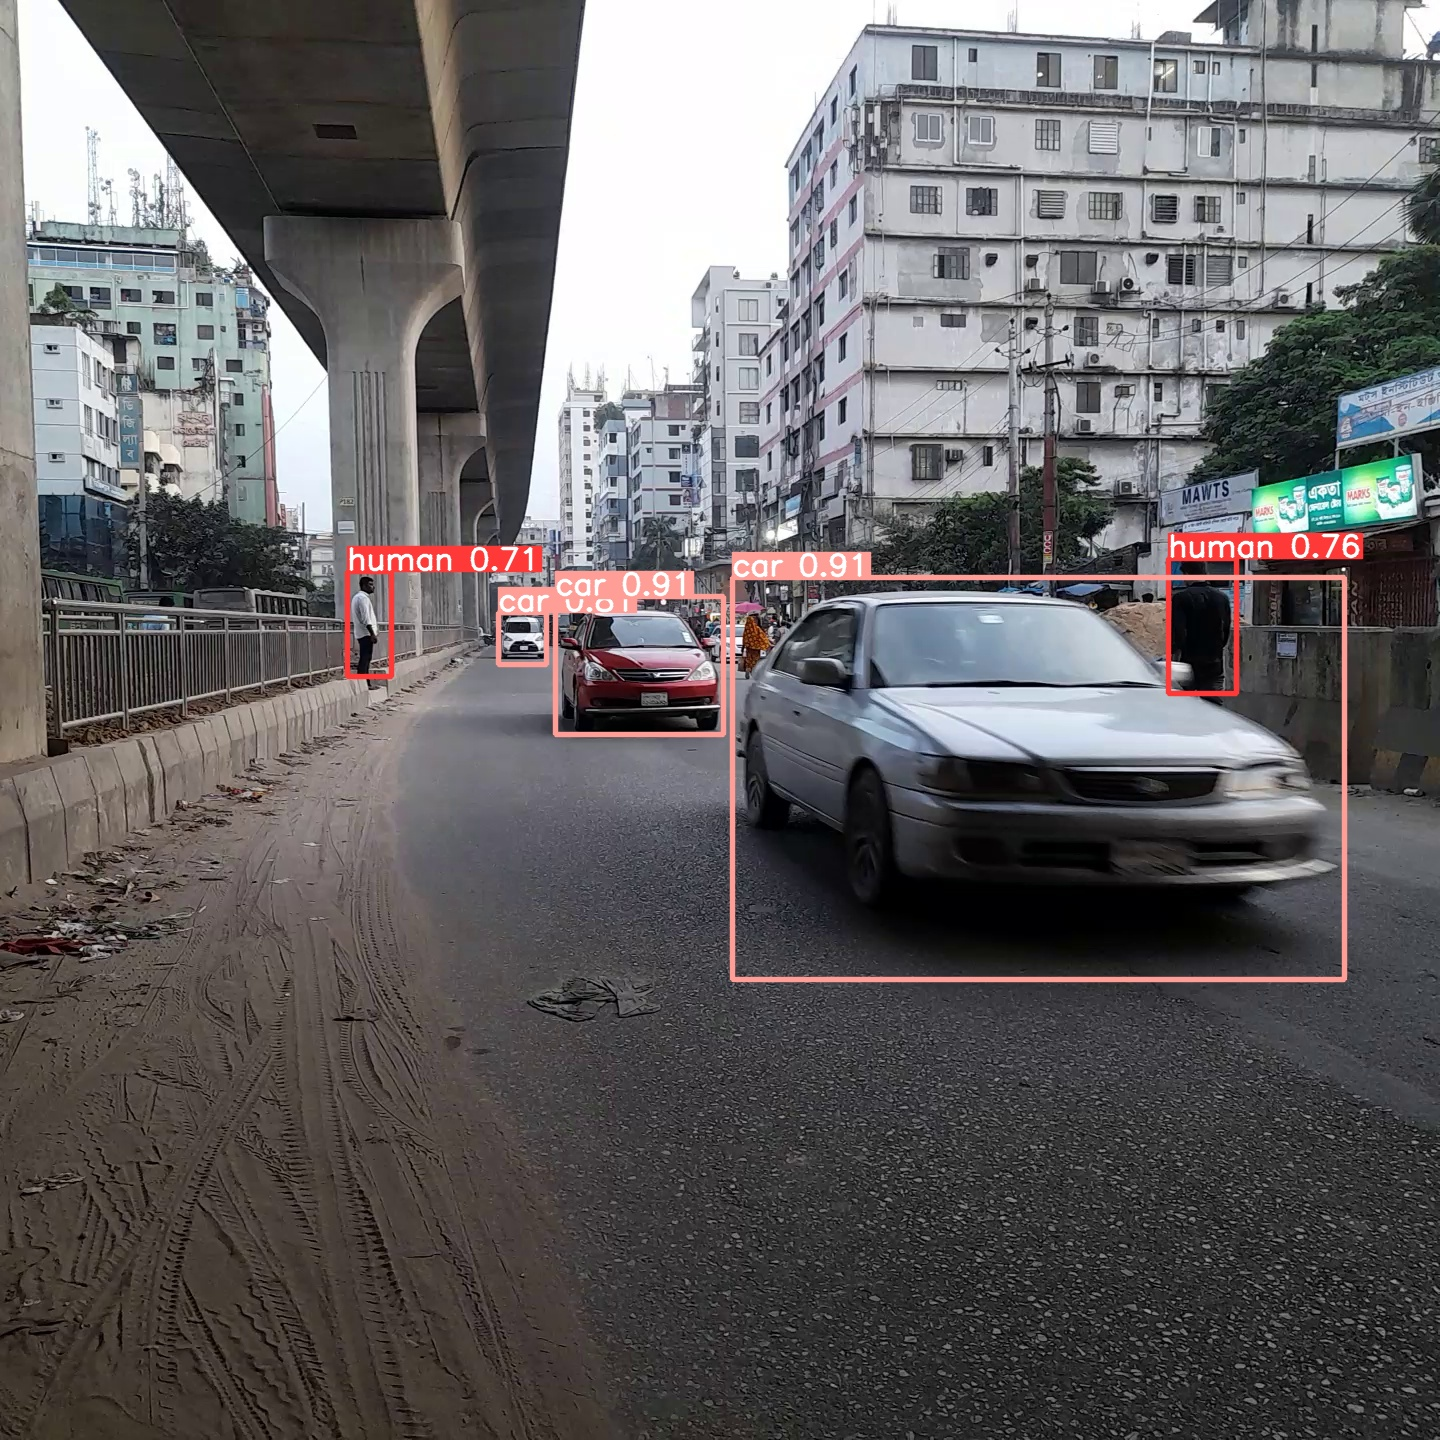

In [6]:
display.Image(filename='/content/yolov5/runs/detect/exp/frame180.jpg', width=600)